# Power consumption prediction for steel industry 

### MLMaverick Team
- Seulah Lee 300361747
- David Steven Salazar Villegas 300356922
- Ishwinder Singh 300351938
### Reference
- V E,Sathishkumar, Shin,Changsun, and Cho,Yongyun. (2023). Steel Industry Energy Consumption. UCI Machine Learning Repository. https://doi.org/10.24432/C52G8C.

## Data Pre-Processing
1. Import libraries and dataset
2. Check and drop all the rows that are empty, if any;
3. Check for duplicate records and only retain the first one;
4. Perform any necessary pre-preprocessing (This is optional if you think it is necessary.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# So that the plot will be saved within the jupyter notebook
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv('Steel_industry_data.csv')
    
print("This dataset has {} data points with {} variables each.".format(*df.shape))
df.head()

This dataset has 35040 data points with 11 variables each.


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


- Usage_kWh	- Continuous kWh
- Lagging Current reactive power - Continuous kVarh
- Leading Current reactive power - Continuous kVarh
- tCO2(CO2) - Continuous ppm
- Lagging Current power factor - Continuous %
- Leading Current Power factor - Continuous %
- Number of Seconds from midnight - Continuous S
- Week status - Categorical - (Weekend or a Weekday)
- Day of week - Categorical - Sunday, Monday - Saturday
- Load Type - Categorical - Light Load, Medium Load, Maximum Load

In [2]:
#drop null values if any
df.dropna(how='all').reset_index(drop=True, inplace=True)

print("This dataset has {} data points with {} variables.".format(*df.shape))
#No empty records in the original Steel_industry_data.csv

This dataset has 35040 data points with 11 variables.


In [3]:
#drop_duplicates
#By default, it removes duplicate rows based on all columns.

df.drop_duplicates(inplace=True)
print("This dataset has {} data points with {} variables.".format(*df.shape))
#No duplicate records in the original Steel_industry_data.csv

This dataset has 35040 data points with 11 variables.


In [4]:
#drop 'Date' field
df_cleaned = df.drop(columns=['date'])

#drop 'Lagging_Current_Power_Factor' and 'Leading_Current_Power_Factor' as they are same columns except the unit (Percentage)
df_cleaned.drop(columns=['Lagging_Current_Power_Factor','Leading_Current_Power_Factor'], inplace=True)

#remame 'Lagging_Current_Reactive.Power_kVarh' and 'Leading_Current_Reactive_Power_kVarh'
df_cleaned.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'Lagging_Current', 
                           'Leading_Current_Reactive_Power_kVarh':'Leading_Current'}, inplace=True)

df_cleaned.head()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,4500,Weekday,Monday,Light_Load


In [5]:
df_cleaned.dtypes

Usage_kWh          float64
Lagging_Current    float64
Leading_Current    float64
CO2(tCO2)          float64
NSM                  int64
WeekStatus          object
Day_of_week         object
Load_Type           object
dtype: object

## Replacing categorical data
- Week Status feature contains categorical data which is not useful for calculations so we used pd.get_dummies function to get all the different categories for transmission and then converting it to integer type to get values 1 and 0
- 1 represents that the current item has specific type of Week Status present.
- Create a dummy datafram to get all the categories and their value and then join the dummy dataframe into our main dataframe.
- Remove the Week Status column which only contains the categorical values.
- Do the same process with Day_of_week and Load_Type columns and repeat all the steps.

In [6]:
df_weekstatus = pd.get_dummies(df_cleaned['WeekStatus'])
df_weekstatus.head()

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
df_weekstatus['Weekday'] = df_weekstatus['Weekday'].astype(int)
df_weekstatus['Weekend'] = df_weekstatus['Weekend'].astype(int)
df_cleaned = df_cleaned.join(df_weekstatus)
df_cleaned.drop(columns='WeekStatus',inplace=True)
df_cleaned.head()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,Day_of_week,Load_Type,Weekday,Weekend
0,3.17,2.95,0.0,0.0,900,Monday,Light_Load,1,0
1,4.00,4.46,0.0,0.0,1800,Monday,Light_Load,1,0
2,3.24,3.28,0.0,0.0,2700,Monday,Light_Load,1,0
3,3.31,3.56,0.0,0.0,3600,Monday,Light_Load,1,0
4,3.82,4.50,0.0,0.0,4500,Monday,Light_Load,1,0


In [8]:
df_dayofweek = pd.get_dummies(df_cleaned['Day_of_week'])
df_dayofweek.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [9]:
df_dayofweek['Monday'] = df_dayofweek['Monday'].astype(int)
df_dayofweek['Tuesday'] = df_dayofweek['Tuesday'].astype(int)
df_dayofweek['Wednesday'] = df_dayofweek['Wednesday'].astype(int)
df_dayofweek['Thursday'] = df_dayofweek['Thursday'].astype(int)
df_dayofweek['Friday'] = df_dayofweek['Friday'].astype(int)
df_dayofweek['Saturday'] = df_dayofweek['Saturday'].astype(int)
df_dayofweek['Sunday'] = df_dayofweek['Sunday'].astype(int)
df_cleaned = df_cleaned.join(df_dayofweek)
df_cleaned.drop(columns='Day_of_week',inplace=True)
df_cleaned.head()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3.17,2.95,0.0,0.0,900,Light_Load,1,0,0,1,0,0,0,0,0
1,4.00,4.46,0.0,0.0,1800,Light_Load,1,0,0,1,0,0,0,0,0
2,3.24,3.28,0.0,0.0,2700,Light_Load,1,0,0,1,0,0,0,0,0
3,3.31,3.56,0.0,0.0,3600,Light_Load,1,0,0,1,0,0,0,0,0
4,3.82,4.50,0.0,0.0,4500,Light_Load,1,0,0,1,0,0,0,0,0


In [10]:
df_loadtype = pd.get_dummies(df_cleaned['Load_Type'])
df_loadtype.head()

,Light_Load,Maximum_Load,Medium_Load
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
df_loadtype['Light_Load'] = df_loadtype['Light_Load'].astype(int)
df_loadtype['Medium_Load'] = df_loadtype['Medium_Load'].astype(int)
df_loadtype['Maximum_Load'] = df_loadtype['Maximum_Load'].astype(int)
df_cleaned = df_cleaned.join(df_loadtype)
df_cleaned.drop(columns='Load_Type',inplace=True)
df_cleaned.head()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,3.17,2.95,0.0,0.0,900,1,0,0,1,0,0,0,0,0,1,0,0
1,4.00,4.46,0.0,0.0,1800,1,0,0,1,0,0,0,0,0,1,0,0
2,3.24,3.28,0.0,0.0,2700,1,0,0,1,0,0,0,0,0,1,0,0
3,3.31,3.56,0.0,0.0,3600,1,0,0,1,0,0,0,0,0,1,0,0
4,3.82,4.50,0.0,0.0,4500,1,0,0,1,0,0,0,0,0,1,0,0


### This is the final shape of the data after cleaning

In [12]:
print(df_cleaned.head())
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

   Usage_kWh  Lagging_Current  Leading_Current  CO2(tCO2)   NSM  Weekday  \
0       3.17             2.95              0.0        0.0   900        1   
1       4.00             4.46              0.0        0.0  1800        1   
2       3.24             3.28              0.0        0.0  2700        1   
3       3.31             3.56              0.0        0.0  3600        1   
4       3.82             4.50              0.0        0.0  4500        1   

   Weekend  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0        0       0       1         0       0         0        0          0   
1        0       0       1         0       0         0        0          0   
2        0       0       1         0       0         0        0          0   
3        0       0       1         0       0         0        0          0   
4        0       0       1         0       0         0        0          0   

   Light_Load  Maximum_Load  Medium_Load  
0           1             0    

## Data Exploration 
1. Display a summary statistic of the data.
2. Show correlations among features
3. Display some scatter plot of some interesting features (based on the correlation)
4. Display the heatmap of those interesting features.

In [13]:
df_cleaned.describe()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,42750.000000,0.715068,0.284932,0.142466,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.515753,0.207534,0.276712
std,33.444380,16.306000,7.424463,0.016151,24940.534317,0.451388,0.451388,0.349532,0.352313,0.349532,0.349532,0.349532,0.349532,0.349532,0.499759,0.405547,0.447379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,21375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,42750.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,64125.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,157.180000,96.910000,27.760000,0.070000,85500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### A common practice with outlier - removing max value (if they are more than 3 times larger than the mean)

In [14]:
# find out the indexes of the data with Usage_kWh energy usage
max_index = df_cleaned.loc[df_cleaned["Usage_kWh"]==157.18].index
print(max_index)

# let's drop it
df_cleaned.drop(max_index, inplace=True)

Int64Index([31238], dtype='int64')


In [15]:
df_cleaned.describe()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
count,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000
mean,27.383188,13.033537,3.871059,0.011523,42750.218328,0.715060,0.284940,0.142470,0.145210,0.142470,0.142470,0.142441,0.142470,0.142470,0.515768,0.207540,0.276692
std,33.437668,16.302570,7.424540,0.016148,24940.856736,0.451392,0.451392,0.349536,0.352317,0.349536,0.349536,0.349507,0.349536,0.349536,0.499758,0.405551,0.447369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,21150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,43200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,51.230000,22.625000,2.090000,0.020000,64350.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,153.140000,96.910000,27.760000,0.070000,85500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The rest of outliers can be dealt with Feature Scaling (StandardScaler) 

In [16]:
df_cleaned.corr()

,Usage_kWh,Lagging_Current,Leading_Current,CO2(tCO2),NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
Usage_kWh,1.000000,0.896104,-0.324935,0.988176,0.234695,0.295470,-0.295470,0.070847,0.071010,-0.139749,-0.241822,0.093907,0.085872,0.059379,-0.578940,0.487955,0.204394
Lagging_Current,0.896104,1.000000,-0.405175,0.886903,0.082716,0.319872,-0.319872,0.076769,0.077691,-0.168109,-0.244974,0.107776,0.089431,0.060808,-0.381694,0.413011,0.051987
Leading_Current,-0.324935,-0.405175,1.000000,-0.332786,0.371602,-0.260424,0.260424,-0.068740,-0.073792,0.128348,0.207964,-0.082518,-0.074759,-0.035922,-0.128822,-0.155264,0.284659
CO2(tCO2),0.988176,0.886903,-0.332786,1.000000,0.231801,0.290458,-0.290458,0.071090,0.071502,-0.135872,-0.239226,0.094922,0.077360,0.059663,-0.573228,0.487311,0.198596
NSM,0.234695,0.082716,0.371602,0.231801,1.000000,0.000006,-0.000006,-0.000004,-0.000004,-0.000004,-0.000004,0.000021,-0.000004,-0.000004,-0.594453,0.211057,0.472738
Weekday,0.295470,0.319872,-0.260424,0.290458,0.000006,1.000000,-1.000000,0.257301,0.260179,-0.645701,-0.645701,0.257271,0.257301,0.257301,-0.221982,0.117253,0.141684
Weekend,-0.295470,-0.319872,0.260424,-0.290458,-0.000006,-1.000000,1.000000,-0.257301,-0.260179,0.645701,0.645701,-0.257271,-0.257301,-0.257301,0.221982,-0.117253,-0.141684
Friday,0.070847,0.076769,-0.068740,0.071090,-0.000004,0.257301,-0.257301,1.000000,-0.167998,-0.166140,-0.166140,-0.166120,-0.166140,-0.166140,-0.062529,0.033011,0.039926
Monday,0.071010,0.077691,-0.073792,0.071502,-0.000004,0.260179,-0.260179,-0.167998,1.000000,-0.167998,-0.167998,-0.167979,-0.167998,-0.167998,-0.054501,0.028771,0.034801
Saturday,-0.139749,-0.168109,0.128348,-0.135872,-0.000004,-0.645701,0.645701,-0.166140,-0.167998,1.000000,-0.166140,-0.166120,-0.166140,-0.166140,0.047264,-0.024974,-0.030160


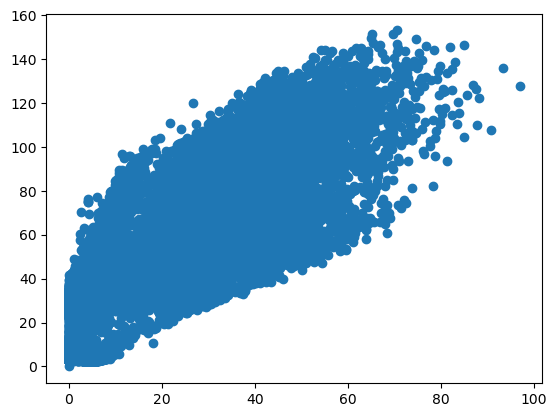

In [17]:
plt.scatter(df_cleaned['Lagging_Current'], df_cleaned['Usage_kWh'])

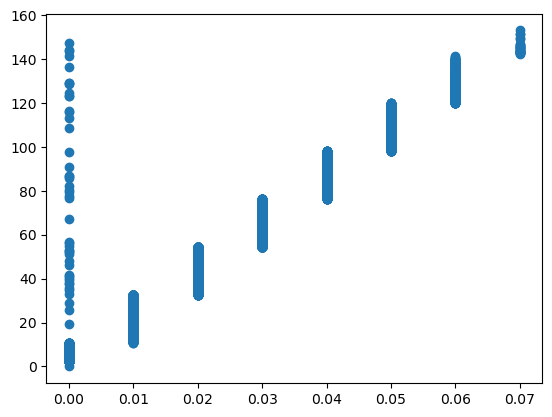

In [18]:
plt.scatter(df_cleaned['CO2(tCO2)'], df_cleaned['Usage_kWh'])

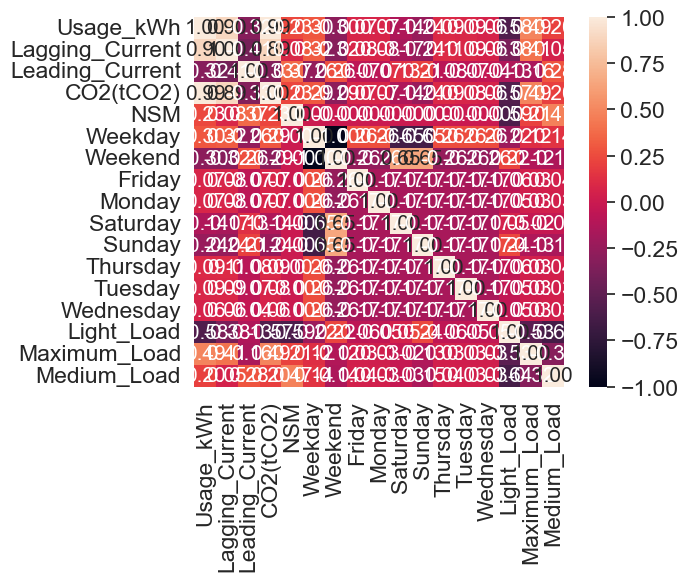

In [19]:
# Calculate and show correlation matrix
import seaborn as sns

cm = np.corrcoef(df_cleaned.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=df_cleaned.columns,
                xticklabels=df_cleaned.columns)

## Model Planning and Implementation
### Linear Regression model
1. Split the dataset into training and test sets - Spliting 80:20 and using randomstate=42 to make a repeatable result.
2. Build the model
3. Get predictions for the test dataset
4. Calculate the performance metric
5. Get the coefficient list

In [20]:
# first divide the df_cleaned into features and response
response = df_cleaned['Usage_kWh']
features = df_cleaned.drop('Usage_kWh', axis = 1)

In [21]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [22]:
# build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
# get the predictions for the test dataset
predictions = model.predict(X_test)

In [24]:
#R-squared
r2 = model.score(X_test,Y_test)
print ("R^2 : ", r2)

R^2 :  0.9836684028209878


In [25]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, predictions)**0.5
print ("RMSE :" , rmse)

RMSE : 4.278349039754013


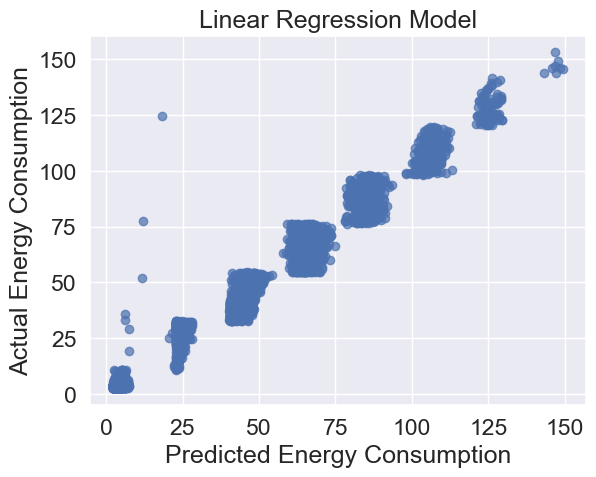

In [26]:
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Actual Energy Consumption')
plt.title('Linear Regression Model')
plt.show()

### Linear Regression with Feature Scaling

In [27]:
# we will create several list to store the result
method = []
r2_list = []
rmse_list = []

# append the result of normal LR
method.append('Normal')
r2_list.append(r2)
rmse_list.append(rmse)

#### Standard Scaler

In [28]:
# scale the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# the following will fit(train) the Standard Scaler 
# AND scale the features (columns)
zscore = ss.fit_transform(features)

feature_ss = pd.DataFrame(zscore, index=features.index, columns= features.columns)
print(feature_ss.head())
print(feature_ss.tail())

   Lagging_Current  Leading_Current  CO2(tCO2)       NSM   Weekday   Weekend  \
0        -0.618533        -0.521395   -0.71357 -1.678002  0.631255 -0.631255   
1        -0.525908        -0.521395   -0.71357 -1.641916  0.631255 -0.631255   
2        -0.598291        -0.521395   -0.71357 -1.605831  0.631255 -0.631255   
3        -0.581115        -0.521395   -0.71357 -1.569745  0.631255 -0.631255   
4        -0.523455        -0.521395   -0.71357 -1.533659  0.631255 -0.631255   

     Friday    Monday  Saturday    Sunday  Thursday   Tuesday  Wednesday  \
0 -0.407602  2.426231 -0.407602 -0.407602 -0.407555 -0.407602  -0.407602   
1 -0.407602  2.426231 -0.407602 -0.407602 -0.407555 -0.407602  -0.407602   
2 -0.407602  2.426231 -0.407602 -0.407602 -0.407555 -0.407602  -0.407602   
3 -0.407602  2.426231 -0.407602 -0.407602 -0.407555 -0.407602  -0.407602   
4 -0.407602  2.426231 -0.407602 -0.407602 -0.407555 -0.407602  -0.407602   

   Light_Load  Maximum_Load  Medium_Load  
0    0.968946     -

In [29]:
# Build the model
# Split the data into training and testing subsets
X_train_ss, X_test_ss, Y_train_ss, Y_test_ss = train_test_split(feature_ss, response, test_size=0.2, random_state = 42)

model_ss = LinearRegression()
model_ss.fit(X_train_ss, Y_train_ss)

pred_ss = model_ss.predict(X_test_ss)

In [30]:
#r2
r2_ss = model_ss.score(X_test_ss, Y_test_ss)
print("R2 for testset:", r2_ss)

R2 for testset: 0.983668402820984


In [31]:
# rmse
rmse_ss = mean_squared_error(Y_test_ss, pred_ss)**0.5

print("RMSE :", rmse_ss)

RMSE : 4.278349039754511


In [32]:
# append the result
method.append('Standard Scaler')
r2_list.append(r2_ss)
rmse_list.append(rmse_ss)

#### Ridge

In [33]:
#importing libraries
from sklearn.linear_model import Ridge

In [34]:
#generating alphas for the model
alphas_r = 10**np.linspace(5,-5,20)
alphas_r

array([1.00000000e+05, 2.97635144e+04, 8.85866790e+03, 2.63665090e+03,
       7.84759970e+02, 2.33572147e+02, 6.95192796e+01, 2.06913808e+01,
       6.15848211e+00, 1.83298071e+00, 5.45559478e-01, 1.62377674e-01,
       4.83293024e-02, 1.43844989e-02, 4.28133240e-03, 1.27427499e-03,
       3.79269019e-04, 1.12883789e-04, 3.35981829e-05, 1.00000000e-05])

In [35]:
#Split Training and Test set for Ridge

X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(features, response, test_size=0.2, random_state = 42)

In [36]:
ridge = Ridge()
coefs = []

for a in alphas_r:
    ridge.set_params(alpha = a)
    ridge.fit(features,response)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.84543e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.73981e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.1783e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.12469e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211

(20, 16)

In [37]:
#ridge them!
rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_alpha = 1
best_r2_test = 0

for a in alphas_r:
    ridge = Ridge(alpha = a, max_iter=1000)
    ridge.fit(X_train_r, Y_train_r)
    pred_r = ridge.predict(X_test_r)
    
    r2_train_list.append(ridge.score(X_train_r,Y_train_r))
    
    r2_test = ridge.score(X_test_r,Y_test_r)
    r2_test_list.append(r2_test)
    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = a
    
    rmse = mean_squared_error(Y_test_r, pred_r) ** 0.5;
    rmse_test_list.append(rmse)
    print('RMSE: ', rmse, 'for alpha', a)
    
    

ridge_result = np.vstack((alphas_r, \
                         r2_train_list, \
                         r2_test_list, \
                         rmse_test_list)).T
ridge_df = pd.DataFrame(ridge_result, \
                        columns=['Alpha', 'R2(trian)', 'R2(test)', 'RMSE'])
ridge_df

RMSE:  13.864993495567463 for alpha 100000.0
RMSE:  13.529831415118839 for alpha 29763.51441631319
RMSE:  12.919143235039304 for alpha 8858.667904100832
RMSE:  12.361014742001908 for alpha 2636.650898730358
RMSE:  12.143741218641672 for alpha 784.7599703514614
RMSE:  12.071579735409193 for alpha 233.57214690901236
RMSE:  11.959565993069436 for alpha 69.51927961775606
RMSE:  11.620771044393406 for alpha 20.6913808111479
RMSE:  10.645882412509748 for alpha 6.158482110660267
RMSE:  8.525971294819136 for alpha 1.8329807108324374
RMSE:  5.975269199482911 for alpha 0.5455594781168526
RMSE:  4.6716153103992 for alpha 0.16237767391887242
RMSE:  4.357930888932937 for alpha 0.04832930238571752
RMSE:  4.297263864731794 for alpha 0.01438449888287663
RMSE:  4.283509779830958 for alpha 0.004281332398719396
RMSE:  4.279842229392624 for alpha 0.0012742749857031347
RMSE:  4.278789637173682 for alpha 0.00037926901907322537
RMSE:  4.278479836986798 for alpha 0.00011288378916846884
RMSE:  4.27838793946026

C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.30613e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.17457e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.47231e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.40574e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

,Alpha,R2(trian),R2(test),RMSE
0,100000.000000,0.835743,0.828480,13.864993
1,29763.514416,0.843465,0.836672,13.529831
2,8858.667904,0.857032,0.851083,12.919143
3,2636.650899,0.868681,0.863672,12.361015
4,784.759970,0.872859,0.868423,12.143741
5,233.572147,0.874167,0.869982,12.071580
6,69.519280,0.876395,0.872383,11.959566
7,20.691381,0.883176,0.879511,11.620771
8,6.158482,0.901592,0.898879,10.645882
9,1.832981,0.935747,0.935142,8.525971


In [38]:
# find out the coefficient for the best result
print('Best alpha:', best_alpha)
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train_r, Y_train_r)
pred_ridge = ridge.predict(X_test_r)
r2_train_ridge = ridge.score(X_train_r, Y_train_r)
r2_test_ridge = ridge.score(X_test_r, Y_test_r)
rmse_ridge = mean_squared_error(Y_test_r, pred_ridge) ** 0.5

print('R^2 train:', r2_train_ridge)
print('R^2 test:', r2_test_ridge)
print('RMSE:', rmse_ridge)
print()
print(pd.Series(ridge.coef_, index=features.columns))

Best alpha: 1e-05
R^2 train: 0.9782763127958938
R^2 test: 0.9836683144492565
RMSE: 4.278360615002779

Lagging_Current    2.539125e-01
Leading_Current    1.944778e-02
CO2(tCO2)          1.772371e+03
NSM               -5.435871e-07
Weekday           -1.958966e-02
Weekend            1.958967e-02
Friday            -1.344112e-01
Monday            -1.402417e-01
Saturday          -1.649300e-01
Sunday             1.844357e-01
Thursday          -2.175402e-01
Tuesday            5.752387e-01
Wednesday         -1.025792e-01
Light_Load        -1.865844e+00
Maximum_Load       8.901169e-01
Medium_Load        9.756419e-01
dtype: float64


C:\Users\imseu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.18398e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [39]:
# append the result of ridge LR
method.append('Ridge')
r2_list.append(r2_test_ridge)
rmse_list.append(rmse_ridge)

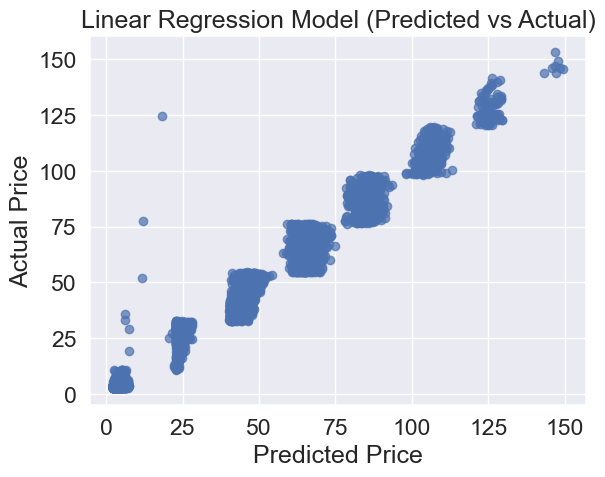

In [40]:
# plot the prediction vs actual

actual_values = Y_test_r
plt.scatter(pred_ridge, actual_values, alpha=0.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Linear Regression Model (Predicted vs Actual)")
plt.show()

#### Lasso

In [41]:
#importing libraries
from sklearn.linear_model import Lasso

In [42]:
#selecting random alphas
alphas = np.linspace(1000,0.01,100)

In [43]:
#Split Training and Test set for lasso
xtrain_ll,xtest_ll,ytrain_ll,ytest_ll  = train_test_split(features,response,test_size=0.1,random_state=42)

In [44]:
rmse_test_list_ll =[]
r2_test_list_ll =[]
r2_train_list_ll=[]


best_alpha_ll= 1
best_r2_test_ll=0

for a in alphas:
    lasso = Lasso(alpha =a , max_iter=1000)
    lasso.fit(xtrain_ll,ytrain_ll)
    pred_ll = lasso.predict(xtest_ll)
    
    
    r2_train_list_ll.append(lasso.score(xtrain_ll,ytrain_ll))
    
    
    r2_test_ll = lasso.score(xtest_ll,ytest_ll)
    r2_test_list_ll.append(r2_test_ll)
    if r2_test_ll > best_r2_test_ll:
        best_r2_test_ll = r2_test_ll
        best_alpha_ll = a
    rmse_ll = mean_squared_error(ytest_ll, pred_ll) ** 0.5
    rmse_test_list_ll.append(rmse_ll)
    print('RMSE Lasso : ', rmse_ll, 'for alpha',a)
print("best alpha for Lasso",best_alpha_ll)
print("best_R2 for Lasso",best_r2_test_ll)
lasso_result = np.vstack((alphas, r2_train_list_ll,r2_test_list_ll,rmse_test_list_ll)).T
lasso_df = pd.DataFrame(lasso_result,columns=['Alpha','R2(train)','R2(test)','RMSE'])

RMSE Lasso :  32.8115733933617 for alpha 1000.0
RMSE Lasso :  32.811575211478036 for alpha 989.8990909090909
RMSE Lasso :  32.81157703447739 for alpha 979.7981818181818
RMSE Lasso :  32.81157886235976 for alpha 969.6972727272728
RMSE Lasso :  32.81158069512516 for alpha 959.5963636363637
RMSE Lasso :  32.81158253277357 for alpha 949.4954545454545
RMSE Lasso :  32.811584375305 for alpha 939.3945454545454
RMSE Lasso :  32.811586222719455 for alpha 929.2936363636363
RMSE Lasso :  32.81158807501692 for alpha 919.1927272727273
RMSE Lasso :  32.81158993219741 for alpha 909.0918181818182
RMSE Lasso :  32.81159179426091 for alpha 898.9909090909091
RMSE Lasso :  32.811593661207425 for alpha 888.89
RMSE Lasso :  32.81159553303696 for alpha 878.7890909090909
RMSE Lasso :  32.8115974097495 for alpha 868.6881818181819
RMSE Lasso :  32.811599291345054 for alpha 858.5872727272726
RMSE Lasso :  32.81160117782362 for alpha 848.4863636363636
RMSE Lasso :  32.811603069185196 for alpha 838.3854545454545
R

In [45]:
lasso = Lasso(alpha= best_alpha_ll)
lasso.fit(xtrain_ll,ytrain_ll)
pred_ll= lasso.predict(xtest_ll)
r2_train_ll = lasso.score(xtrain_ll,ytrain_ll)
r2_test_ll = lasso.score(xtest_ll,ytest_ll)
rmse_ll = mean_squared_error(ytest_ll,pred_ll) ** 0.5
print("R^2  train for Lasso with best alpha : ",r2_train_ll)
print("R^2 test for Lasso with best alpha: ",r2_test_ll)
print("RMSE for Lasso",rmse_ll)
print(pd.Series(lasso.coef_,index=features.columns))

R^2  train for Lasso with best alpha :  0.9764435239451847
R^2 test for Lasso with best alpha:  0.9811100145246799
RMSE for Lasso 4.62894594653997
Lagging_Current       0.443150
Leading_Current      -0.027509
CO2(tCO2)          1517.531421
NSM                   0.000006
Weekday              -0.215706
Weekend               0.000000
Friday               -0.000000
Monday               -0.000000
Saturday              0.000000
Sunday                0.382717
Thursday             -0.099665
Tuesday               0.564484
Wednesday             0.000000
Light_Load           -5.042277
Maximum_Load          0.021655
Medium_Load          -0.000000
dtype: float64


In [46]:
# append the result of lasso LR
method.append('Lasso')
r2_list.append(r2_test_ll)
rmse_list.append(rmse_ll)

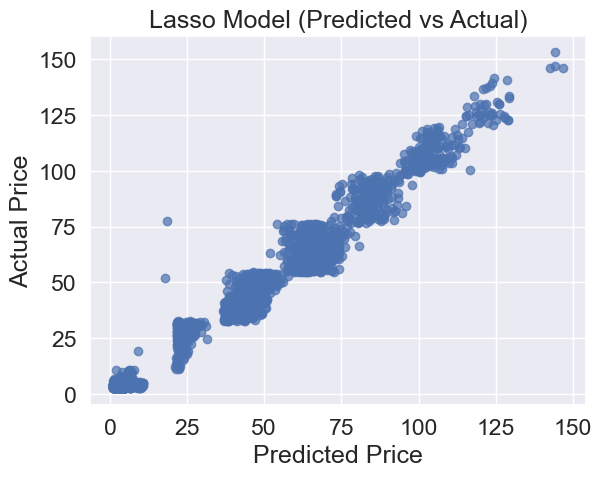

In [47]:
actual_values_ll = ytest_ll
plt.scatter(pred_ll, actual_values_ll, alpha=0.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Lasso Model (Predicted vs Actual)")
plt.show()

### Compare the result 

In [48]:
# compare
results = np.vstack((method, r2_list, rmse_list)).T
results_df = pd.DataFrame(results, columns=['Method', 'R2', 'RMSE'])
results_df

,Method,R2,RMSE
0,Normal,0.9836684028209878,4.278349039754013
1,Standard Scaler,0.983668402820984,4.278349039754511
2,Ridge,0.9836683144492565,4.278360615002779
3,Lasso,0.9811100145246799,4.62894594653997
